<img alt="London picture" src="https://images.unsplash.com/photo-1468407161946-009af5afe6a6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3340&q=80" width="%40" height="%30"/>

# Dog friendly London Neighbourhoods

## 1. Introduction :

   Trying to make a move to London with pets will require good planning and some research. London is a sprawling metropolis and whilst all the main tourist attractions are fairly close to each other, the surrounding areas make for a large and, to those who’re not familiar with the city, somewhat confusing location. 

Many rental properties do not accept pets; pet-friendly rentals in London are limited and tend to get snapped up pretty quickly. In order to succeed in your search you need to focus on certain neighbourhoods.

## 2. Objective: 

In this project my objective is to segment areas of London based on the below criteria:

* Park within 3000 m
* Commuting duration to Bank station
* Crime rates
* 2 bed flat rent prices



## 3. Data Preperation


### 3.A. London Postcodes and Geodata

The first thing to understand about London is how the different areas are described.  There are **33** boroughs of London, each with their own infrastructure, local government, council and highly individual feel and identity.  These boroughs are then further broken down into what are known as ‘**postcodes**’.  Each postcode begins with one or two letters, followed by a one or two digit number.  This code identifies a particular area within a borough, and is then followed by another number-letter-letter combination that identifies a particular area in a street.




In [84]:
# The code was removed by Watson Studio for sharing.

In [85]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
import csv
import lxml.html as lh
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


#!conda install --channel conda-forge geopandas --yes
import geopandas as gpd

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.datasets.samples_generator import make_blobs


# import k-means from clustering stage
from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import random # library for random number generation

print('Libraries imported.')


Libraries imported.



First let's download the location data and read it into a pandas dataframe.

>**Data source:** London data store - Greater London Authority  
**Source link:** https://data.london.gov.uk/dataset/postcode-directory-for-london  
**Data details:** Postcode, Latitude, Longtitude, LSOA*  
(* *A Lower Layer Super Output Area (LSOA) is a geographic area. Lower Layer Super Output Areas are a geographic hierarchy designed to improve the reporting of small area statistics in England and Wales.*)

In [86]:
loc=pd.read_csv("https://data.london.gov.uk/download/postcode-directory-for-london/fd269535-973a-418f-8847-da405687e2e2/London_postcode-ONS-postcode-Directory-May15.csv")
loc.head()


,pcd,pcd2,pcds,dointr,doterm,oscty,oslaua,osward,usertype,oseast1m,osnrth1m,osgrdind,oshlthau,hro,ctry,gor,streg,pcon,eer,teclec,ttwa,pct,nuts,psed,cened,edind,oshaprev,lea,oldha,wardc91,wardo91,ward98,statsward,oa01,casward,park,lsoa01,msoa01,ur01ind,oac01,oldpct,oa11,lsoa11,msoa11,parish,wz11,ccg,bua11,buasd11,ru11ind,oac11,lat,long
0,BR1 1AA,BR1 1AA,BR1 1AA,199002,200812,E99999999,E09000006,E05000109,1,540260,169398,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003255,00AFG,E99999999,E01000676,E02000134,5,7A3,5A7,E00003255,E01000676,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
1,BR1 1AB,BR1 1AB,BR1 1AB,201203,,E99999999,E09000006,E05000109,0,540260,169398,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003255,00AFG,E99999999,E01000676,E02000134,5,7A3,5A7,E00003255,E01000676,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
2,BR1 1AD,BR1 1AD,BR1 1AD,201409,,E99999999,E09000006,E05000109,1,540383,168708,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFGA17,AUGA17,1,Q07,30,QEY,02AUGA,01AFGA,00AFGA,00AFGG,E00003264,00AFG,E99999999,E01000675,E02000144,5,2B2,5A7,E00003264,E01000675,E02000144,E43000196,E33029199,E38000023,E34004707,E35000434,,4C3,51.400040,0.016671
3,BR1 1AE,BR1 1AE,BR1 1AE,200808,,E99999999,E09000006,E05000109,0,540194,169201,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFR19,AUFR19,1,Q07,30,QEY,02AUFR,01AFFR,00AFFR,00AFGG,E00003266,00AFG,E99999999,E01000677,E02000144,5,2B2,5A7,E00003266,E01000677,E02000144,E43000196,E33029200,E38000023,E34004707,E35000434,,2D1,51.404517,0.014151
4,BR1 1AX,BR1 1AX,BR1 1AX,200106,200610,E99999999,E09000006,E05000109,1,540421,169620,1,E18000007,E19000003,E92000001,E12000007,5,E14000604,E15000007,E24000016,E30000082,E16000004,E05000109,01AFFX24,AUFX24,1,Q07,30,QEY,02AUFX,01AFFX,00AFFX,00AFGG,E00003250,00AFG,E99999999,E01000676,E02000134,5,2A2,5A7,E00003250,E01000676,E02000134,E43000196,E33029181,E38000023,E34004707,E35000434,,2D1,51.408226,0.017578


Let's drop unnecessary columns

In [87]:
loc.rename(columns = {'pcd': 'Postcode','oa11': 'LSOA2','lsoa11': 'LSOA', 'lat' : 'Latitude', 'long': 'Longitude'} ,inplace = True)
loc=loc[['Postcode','LSOA','LSOA2', 'Latitude', 'Longitude']]
loc.head()

,Postcode,LSOA,LSOA2,Latitude,Longitude
0,BR1 1AA,E01000676,E00003255,51.406271,0.015177
1,BR1 1AB,E01000676,E00003255,51.406271,0.015177
2,BR1 1AD,E01000675,E00003264,51.400040,0.016671
3,BR1 1AE,E01000677,E00003266,51.404517,0.014151
4,BR1 1AX,E01000676,E00003250,51.408226,0.017578


In [88]:
len(loc)

312430

In [89]:
loc = loc.sort_values('LSOA', ascending=False)
loc= loc.drop_duplicates(subset='LSOA', keep='first')
len(loc)

4835

Now lets load geodataframe

In [90]:
map_df = gpd.read_file("https://opendata.arcgis.com/datasets/da831f80764346889837c72508f046fa_3.geojson")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry
0,1,E01013150,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368,POLYGON ((-0.1361269459310195 53.5564371900317...
1,2,E01015580,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755,POLYGON ((-1.785727243039375 51.57653396919847...
2,3,E01023601,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570,POLYGON ((-0.2742822481507952 51.9490044407343...
3,4,E01024217,Dover 005B,Dover 005B,7.351294e+06,13012.376562,"POLYGON ((1.40257897665496 51.23871265508399, ..."
4,5,E01000722,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...


Now let’s preview what our map looks like with no data in it

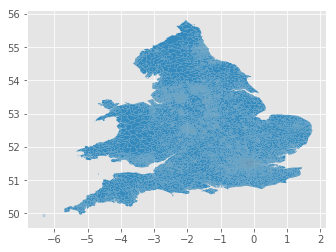

In [91]:
map_df.rename(columns = {'lsoa11cd': 'LSOA'} ,inplace = True)
map_df.plot()

In [92]:
# join the geodataframe with location data
location = map_df.set_index("LSOA").join(loc.set_index("LSOA"))
location.head()

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude
LSOA,,,,,,,,,,
E01013150,1,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368,POLYGON ((-0.1361269459310195 53.5564371900317...,NaN,NaN,NaN,NaN
E01015580,2,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755,POLYGON ((-1.785727243039375 51.57653396919847...,NaN,NaN,NaN,NaN
E01023601,3,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570,POLYGON ((-0.2742822481507952 51.9490044407343...,NaN,NaN,NaN,NaN
E01024217,4,Dover 005B,Dover 005B,7.351294e+06,13012.376562,"POLYGON ((1.40257897665496 51.23871265508399, ...",NaN,NaN,NaN,NaN
E01000722,5,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552


In [93]:
len(location)

34753

In [94]:
location= location.dropna()
len(location)

4835

In [95]:
#Lets check if postcode values are unique
location['Postcode'].nunique()

4835

In [96]:
#Slicing postcode in a new coloumn, this will come in handy later

location['Postcode District'] = location['Postcode'].str[:3]
location.head()

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District
LSOA,,,,,,,,,,,
E01000722,5,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5
E01033603,31,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,NW1
E01003626,37,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,E6
E01003989,38,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,SE1
E01004197,41,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,E2


Text(0.1, 0.08, 'Source: Office for National Statistics, 2019')

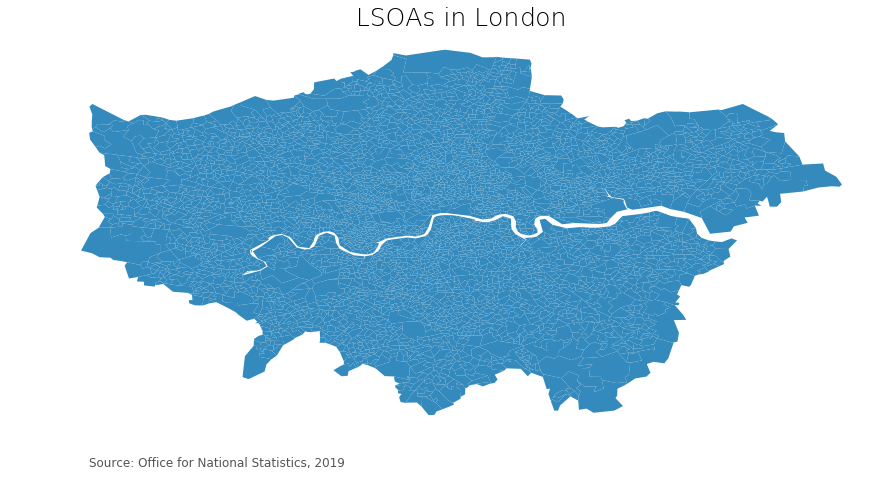

In [97]:
#Now we are ready to preview our London map

London_map = location.plot( figsize=(15,8),scheme='quantiles',  legend =  True)

#remove axis
London_map.axis('off')
# add a title
London_map.set_title('LSOAs in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
London_map.annotate('Source: Office for National Statistics, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


In [98]:
# Save dataframe as csv file to IBM Watson storage 
project.save_data(data=location.to_csv(index=True),file_name='London_geodata_w_postcodes.csv',overwrite=True)
#location.to_csv('London_geodata_w_postcodes.csv')
print("csv saved")

csv saved


### 3.B. Crime Rate


>**Data source:** London data store , Greater London Authority  ; Metropolitan Police Service   
**Source link:** https://data.london.gov.uk/dataset/recorded_crime_summary  
**Data details:**  MPS Borough Level Crime (most recent 24 months) , MPS LSOA Level Crime (most recent 24 months) 

In [16]:
crime=pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/644a9e0d-75a3-4c3a-91ad-03d2a7cb8f8e/MPS%20LSOA%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,LSOA Code,Borough,Major Category,Minor Category,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,E01000007,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E01000008,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [17]:
crime.rename(columns = {'LSOA Code': 'LSOA'} ,inplace = True)
crime.drop(['201710','201711','201712','201801','201802','201803','201804','201805','201806','201807','201808','201809'], axis=1, inplace=True)
crime['Sum_Crime'] =crime.sum(axis=1)
crime.head(10)

,LSOA,Borough,Major Category,Minor Category,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,Sum_Crime
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,0,0,0,0,0,0,1
1,E01000007,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E01000008,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,1,0,0,1,0,0,0,1,0,0,0,0,3
5,E01000012,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
6,E01000013,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
7,E01000015,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,0,0,0,0,0
8,E01000016,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,1,1,0,0,0,0,0,2
9,E01000021,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,0,0,1,0,0,0,1


In [18]:
#Number of crimes per minor crime categories
crime_min_cat=crime.groupby(['Minor Category'])['Sum_Crime'].sum().reset_index()
crime_min_cat = crime_min_cat.sort_values(by = 'Sum_Crime', axis = 0, ascending = True)                                            
crime_min_cat.reset_index(drop = True, inplace = True)
crime_min_cat.tail()

,Minor Category,Sum_Crime
46,Burglary - Residential,60107
47,Theft from a Motor Vehicle,73203
48,Violence with Injury,76480
49,Other Theft,126827
50,Violence without Injury,137972


In [19]:
#Number of crimes per borough
crime_borough=crime.groupby(['Borough'])['Sum_Crime'].sum().reset_index()
crime_borough = crime_borough.sort_values(by = 'Sum_Crime', axis = 0, ascending = True)                                            
crime_borough.reset_index(drop = True, inplace = True)
crime_borough.tail()

,Borough,Sum_Crime
27,Lambeth,33767
28,Newham,34537
29,Camden,37283
30,Southwark,37453
31,Westminster,75927


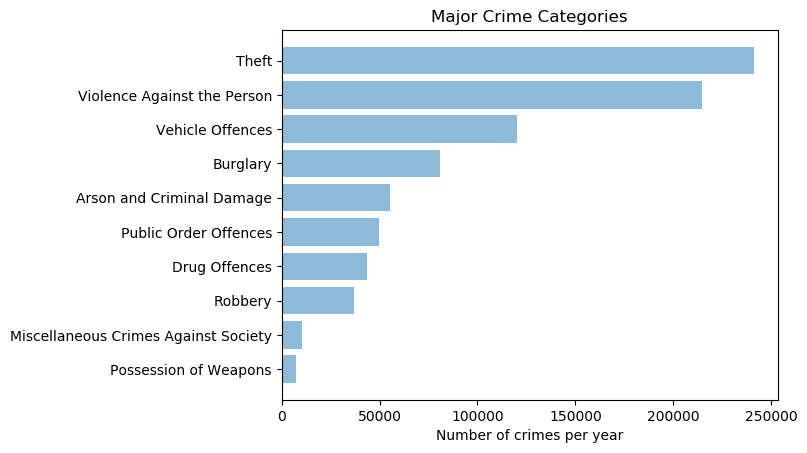

In [20]:
#Number of crimes per major crime categories

crime_maj_cat=crime.groupby(['Major Category'])['Sum_Crime'].sum().reset_index()
crime_maj_cat = crime_maj_cat.sort_values(by = 'Sum_Crime', axis = 0, ascending = True)                                            
crime_maj_cat.reset_index(drop = True, inplace = True)
crime_maj_cat


import matplotlib.pyplot as plt; plt.rcdefaults()

y =  crime_maj_cat['Major Category']
x = crime_maj_cat['Sum_Crime']
y_pos = np.arange(len(y))
 
# Create horizontal bars
plt.barh(y_pos, x,  align='center', alpha=0.5)
 
# Create names on the y-axis
plt.yticks(y_pos, y)
 
plt.xlabel('Number of crimes per year')
plt.title('Major Crime Categories')
# Show graphic
plt.show()


In [21]:
#Calculate LSOA level crime
crime_LSOA=crime.groupby(['LSOA'])['Sum_Crime'].sum().reset_index()
crime_LSOA.head()

,LSOA,Sum_Crime
0,E01000006,105
1,E01000007,468
2,E01000008,215
3,E01000009,271
4,E01000010,1438


In [22]:
crime_LSOA.describe()

,Sum_Crime
count,4829.000000
mean,178.220335
std,302.457483
min,14.000000
25%,84.000000
50%,121.000000
75%,184.000000
max,9074.000000


Text(0, 0.5, 'LSOAs')

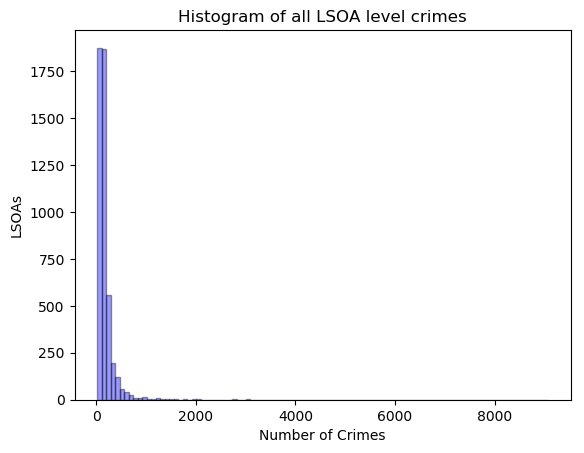

In [23]:
#Distribution of LSOA Level crimes
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(crime_LSOA['Sum_Crime'], color = 'blue', edgecolor = 'black',bins = 500)

#seaborn histogram
sns.distplot(crime_LSOA['Sum_Crime'], hist=True, kde=False, 
           bins=100, color = 'blue',
           hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of all LSOA level crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('LSOAs')


In order to calculate crime per 1000 person, we will pull LSOA level population data

>**Data source:** London data store , Greater London Authority  
**Source link:** https://data.london.gov.uk/dataset/lsoa-atlas  
**Data details:**  LSOA Level population data to calculate crime rate per population ,Current LSOA boundaries post 2011

In [24]:
population=pd.read_excel("https://data.london.gov.uk/download/lsoa-atlas/b8e01c3a-f5e3-4417-82b3-02ad271e6ee8/lsoa-data.xls", header=1)
population.head()

,Unnamed: 0,Unnamed: 1,All Ages,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Aged 0-15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Aged 16-29,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Aged 30-44,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Aged 45-64,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Aged 65+,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Working-age,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Age Structure,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Area (Hectares),Persons per hectare,Unnamed: 102,All households,Couple household with dependent children,Couple household without dependent children,Lone parent household,One person household,Other household Types,% Couple household with dependent children,% Couple household without dependent children,% Lone parent household,% One person household,% Other multi person household,White,Mixed/multiple ethnic groups,Asian/Asian British,Black/African/Caribbean/Black British,Other ethnic group,BAME,White (%),Mixed/multiple ethnic groups (%),Asian/Asian British (%),Black/African/Caribbean/Black British (%),Other ethnic group (%),BAME (%),United Kingdom,Not United Kingdom,% United Kingdom,% Not United Kingdom,Households with at least one person aged 16 or over with English as a main language,Households where no people aged 16 or over have English as a main language,% of households with at least one person aged 16 or over with English as a main language,% of households where no people aged 16 or over have English as a main language,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,No religion,Religion not stated,Christian (%),Buddhist (%),Hindu (%),Jewish (%),Muslim (%),Sikh (%),Other religion (%),No religion (%),Religion not stated (%),Owned outright,Owned with a mortgage or loan,Social rented,Private rented,Owned outright (%),Owned with a mortgage or loan (%),Social rented (%),Private rented (%),All Households,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment",Household spaces with at least one usual resident (%),Household spaces with no usual residents (%),Whole house or bungalow: Detached (%),Whole house or bungalow: Semi-detached (%),Whole house or bungalow: Terraced (including end-terrace) (%),"Flat, maisonette or apartment (%)",Median Price (£),Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Sales,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184
0,Codes,Names,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All Ages,0-15,16-29,30-44,45-64,65+,Working-age,NaN,2012.000000,2013.000000,2011,2011,2011,2011,2011,2011,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011,2011,2011,2011,2011,2011,2011.000000,2011.000000,2011.00

In [25]:
population=population[['Unnamed: 0', 'Unnamed: 14']]
population=population.drop(population.index[0]).reset_index(drop=True)
population.rename(columns = {'Unnamed: 0' : 'LSOA','Unnamed: 14': 'Population'} ,inplace = True)
population.head()

,LSOA,Population
0,E01000907,1466
1,E01000908,1647
2,E01000909,1642
3,E01000912,1653
4,E01000913,1827


In [26]:
population.describe()

,Population
count,4835.000000
mean,1740.751810
std,304.551285
min,965.000000
25%,1550.000000
50%,1690.000000
75%,1878.000000
max,6139.000000


Lets calculate crime per person for each LSOA

In [27]:
crime_per_pop= pd.merge(crime_LSOA, population, how='left', on='LSOA')
crime_per_pop.head(10)

,LSOA,Sum_Crime,Population
0,E01000006,105,1714
1,E01000007,468,1525
2,E01000008,215,1595
3,E01000009,271,1737
4,E01000010,1438,3199
5,E01000011,95,1596
6,E01000012,112,1937
7,E01000013,309,1684
8,E01000014,128,1645
9,E01000015,115,2404


In [28]:
crime_per_pop ['crime_per_1000'] = crime_per_pop ['Sum_Crime'] / (crime_per_pop ['Population'] /1000)
crime_per_pop.head()
crime_per_pop=crime_per_pop.drop(columns=['Sum_Crime','Population'])

In [29]:
crime_per_pop.describe()

,crime_per_1000
count,4829.000000
mean,100.121607
std,173.455501
min,9.556314
25%,51.034483
50%,70.733290
75%,102.873563
max,6844.928751


merge with Post code data

In [30]:
crime_df= pd.merge(location, crime_per_pop, how='right', on='LSOA')
crime_df.set_index('LSOA', inplace=True)
crime_df.head(10)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District,crime_per_1000
LSOA,,,,,,,,,,,,
E01000722,5,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5,126.597687
E01033603,31,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,NW1,120.926865
E01003626,37,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,E6,77.905492
E01003989,38,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,SE1,126.126126
E01004197,41,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,E2,179.050381
E01001673,46,Greenwich 006B,Greenwich 006B,226060.615030,2789.836033,POLYGON ((0.09484693935418946 51.4885192027030...,SE181SA,E00008340,51.489438,0.086516,SE1,130.477118
E01004606,53,Wandsworth 006C,Wandsworth 006C,107761.925014,1280.073556,POLYGON ((-0.2180430017167896 51.4681048674990...,SW151DP,E00023217,51.466894,-0.222404,SW1,70.481928
E01001213,54,Ealing 023A,Ealing 023A,154721.816410,2166.780492,POLYGON ((-0.3755564245671254 51.5159920006656...,UB1 2JD,E00006077,51.513974,-0.375832,UB1,49.261084
E01003600,67,Newham 021B,Newham 021B,118103.947863,1640.480770,POLYGON ((0.02202825545997067 51.5323325034078...,E13 9HJ,E00018126,51.529516,0.025156,E13,85.783133


In [31]:
# Save dataframe as csv file to storage
project.save_data(data=crime_df.to_csv(index=False),file_name='crime_per_1000.csv',overwrite=True)
#crime_df.to_csv('crime_per_pop.csv')
crime_df.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,100.121607
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,173.455501
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,9.556314
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,51.034483
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,70.733290
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,102.873563
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6844.928751


In [32]:
#count NaN values in every column of df
len(crime_df) - crime_df.count()

objectid             0
lsoa11nm             0
lsoa11nmw            0
st_areashape         0
st_lengthshape       0
geometry             0
Postcode             0
LSOA2                0
Latitude             0
Longitude            0
Postcode District    0
crime_per_1000       0
dtype: int64

Text(0, 0.5, 'LSOAs')

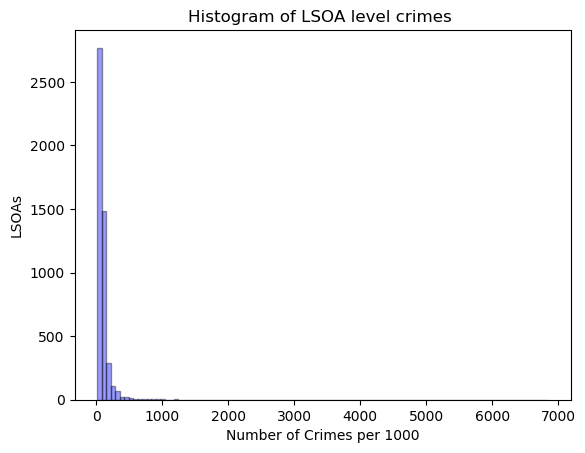

In [33]:
# matplotlib histogram
#plt.hist(crime_LSOA['Sum_Crime'], color = 'blue', edgecolor = 'black',bins = 500)

#seaborn histogram
sns.distplot(crime_df['crime_per_1000'], hist=True, kde=False, 
           bins=100, color = 'blue',
           hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of LSOA level crimes ')
plt.xlabel('Number of Crimes per 1000')
plt.ylabel('LSOAs')

In [34]:
crime_df.dtypes

objectid               int64
lsoa11nm              object
lsoa11nmw             object
st_areashape         float64
st_lengthshape       float64
geometry              object
Postcode              object
LSOA2                 object
Latitude             float64
Longitude            float64
Postcode District     object
crime_per_1000       float64
dtype: object

Text(0.1, 0.08, 'Source: Metropolitan Police Service, 2019')

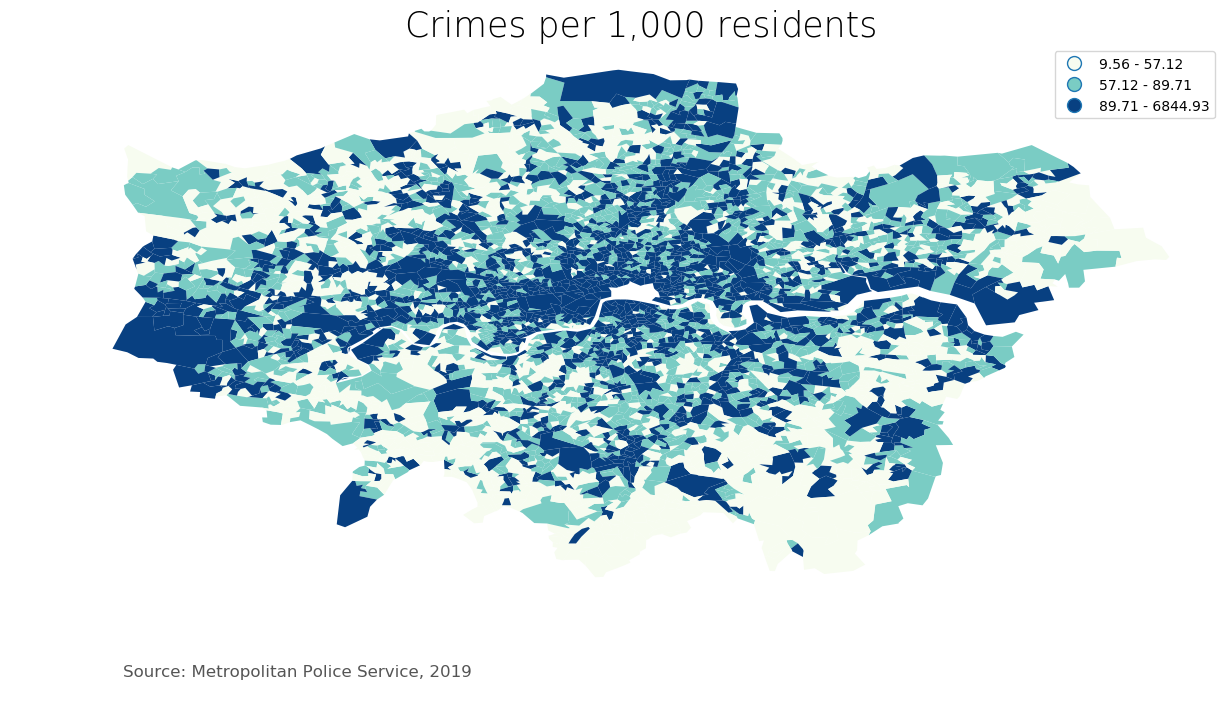

In [35]:
crime_map= crime_df.plot(column='crime_per_1000', cmap =    
                                'GnBu', figsize=(15,9),   
                                 scheme='quantiles', k=3, legend =  
                                  True);

#remove axis
crime_map.axis('off')
# add a title
crime_map.set_title('Crimes per 1,000 residents', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
crime_map.annotate('Source: Metropolitan Police Service, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

In [36]:
#obtain latitude and longitude for London
address = 'London'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of London are 51.5073219, -0.1276474.


In [37]:
crime_map2 = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, Postcode, Crime in zip(crime_df['Latitude'], crime_df['Longitude'], crime_df['Postcode'], crime_df['crime_per_1000']):
    label = '{}: Crime: {}'.format(Postcode, Crime)
    label = folium.Popup(label, parse_html=True)
    if int(Crime) < 70:
        color="green" 
    elif int(Crime) >  102:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color=color,
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(crime_map2)  

crime_map2.save('crime_map2.html')
print('saved')

saved


### 3.C. Commuting duration to Bank station


>**Data source:** London data store , Greater London Authority   
**Source link:** https://data.london.gov.uk/download/mylondon/c2e9ebc1-935b-460c-9361-293398d84fe5/MyLondon_traveltime_to_Bank_station_OA.csv  
**Data details:** 

In [38]:
commute=pd.read_csv("https://data.london.gov.uk/download/mylondon/c2e9ebc1-935b-460c-9361-293398d84fe5/MyLondon_traveltime_to_Bank_station_OA.csv")
commute.head()

,OA11CD,driving_distance_miles,driving_time_mins,public_transport_time_mins,cycling_distance_miles,cycling_time_mins,walking_distance_miles,walking_time_mins
0,E00000001,0.86,6,16,0.83,6,0.80,16
1,E00000003,0.99,7,14,0.98,7,0.73,14
2,E00000005,0.86,6,13,0.83,6,0.65,13
3,E00000007,0.64,5,10,0.61,4,0.51,10
4,E00000010,0.93,6,17,0.88,6,0.85,17


In [39]:
commute.rename(columns = {'OA11CD': 'LSOA2'} ,inplace = True)
commute=commute[['LSOA2', 'public_transport_time_mins']]
commute.head()

,LSOA2,public_transport_time_mins
0,E00000001,16
1,E00000003,14
2,E00000005,13
3,E00000007,10
4,E00000010,17


In [40]:
commute.describe()

,public_transport_time_mins
count,25053.000000
mean,51.111763
std,15.215065
min,0.000000
25%,40.000000
50%,50.000000
75%,61.000000
max,120.000000


In [41]:
crime_commute= pd.merge(crime_df, commute, how='right', on='LSOA2') 
crime_commute.head(10)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District,crime_per_1000,public_transport_time_mins
0,5.0,Bromley 023A,Bromley 023A,569162.040237,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5,126.597687,65
1,31.0,Westminster 009I,Westminster 009I,26843.034373,769.684192,POLYGON ((-0.1651940481248741 51.5223349961171...,NW1 5DF,E00023578,51.521158,-0.167708,NW1,120.926865,33
2,37.0,Newham 015B,Newham 015B,84191.765717,1413.516140,POLYGON ((0.05359712608222828 51.5390032900314...,E6 2AG,E00018285,51.540082,0.057697,E6,77.905492,40
3,38.0,Southwark 018C,Southwark 018C,242134.008988,2505.869788,POLYGON ((-0.05785501055406365 51.484316385276...,SE151RZ,E00020073,51.480043,-0.064614,SE1,126.126126,39
4,41.0,Tower Hamlets 002A,Tower Hamlets 002A,204102.320562,1785.985330,POLYGON ((-0.0525324737766623 51.5348034485191...,E2 9HJ,E00021170,51.533201,-0.053391,E2,179.050381,30
5,46.0,Greenwich 006B,Greenwich 006B,226060.615030,2789.836033,POLYGON ((0.09484693935418946 51.4885192027030...,SE181SA,E00008340,51.489438,0.086516,SE1,130.477118,52
6,53.0,Wandsworth 006C,Wandsworth 006C,107761.925014,1280.073556,POLYGON ((-0.2180430017167896 51.4681048674990...,SW151DP,E00023217,51.466894,-0.222404,SW1,70.481928,50
7,54.0,Ealing 023A,Ealing 023A,154721.816410,2166.780492,POLYGON ((-0.3755564245671254 51.5159920006656...,UB1 2JD,E00006077,51.513974,-0.375832,UB1,49.261084,69
8,67.0,Newham 021B,Newham 021B,118103.947863,1640.480770,POLYGON ((0.02202825545997067 51.5323325034078...,E13 9HJ,E00018126,51.529516,0.025156,E13,85.783133,37
9,68.0,Tower Hamlets 030B,Tower Hamlets 030B,88757.869289,1236.750901,POLYGON ((-0.005912793758553197 51.49551231852...,E14 3HS,E00021258,51.492265,-0.007741,E14,40.421793,51


In [42]:
crime_commute.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000,public_transport_time_mins
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,25053.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,100.121607,51.111763
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,173.455501,15.215065
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,9.556314,0.000000
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,51.034483,40.000000
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,70.733290,50.000000
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,102.873563,61.000000
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6844.928751,120.000000


In [43]:
crime_commute=crime_commute.dropna()
len(crime_commute)

4829

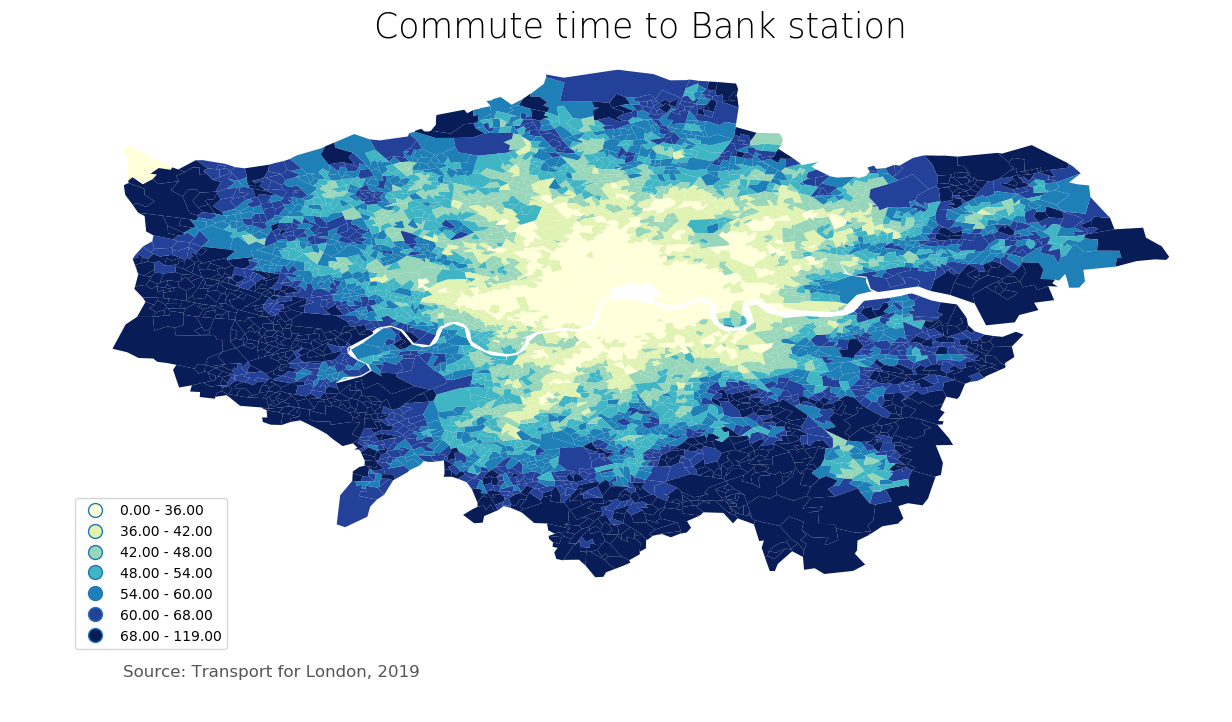

In [44]:
commute_map= crime_commute.plot(column='public_transport_time_mins', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=7, legend =  
                                  True);

# set the range for the choropleth
vmin, vmax = 120, 220

#remove axis
commute_map.axis('off')
# add a title
commute_map.set_title('Commute time to Bank station', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
commute_map.annotate('Source: Transport for London, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#move legend to an empty space
commute_map.get_legend().set_bbox_to_anchor((.15,.2))

# this will save the figure as a high-res png. you can also save as svg
#commute_map.savefig('commute_map.png', dpi=300)

In [45]:
# Save dataframe as csv file to storage
project.save_data(data=crime_commute.to_csv(index=False),file_name='crime_commute.csv',overwrite=True)

{'file_name': 'crime_commute.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'dogfriendlyneigbourhoodsinlondon-donotdelete-pr-amafn7rntlwjrx',
 'asset_id': '23ecb2d1-ba9d-467e-96f4-c6c06a592d30'}

### 3.D. Rent Price

>**Data source:** Valuation Office Agency  
**Source link:** https://www.gov.uk/government/publications/private-rental-market-in-london-october-2018-to-september-2019  
**Data details:**  The data on average rents is given at postcode district level (SW19 or E7, for example), and is based on a sample covering the last 12 months. Data has price categories based on room number: studio,1,2,3,4+. In this ananlyse I will be using 2 bedroom flats  

In [46]:
# Fetch the geo file
Rent= project.get_file("Median_Rent.csv")
# Read the CSV data file from the object storage into a pandas DataFrame
Rent.seek(0)
Rent=pd.read_csv(Rent)
Rent.head()

,Postcode District,Median_Rent
0,BR1,1250
1,BR2,1250
2,BR3,1281
3,BR4,1200
4,BR5,1063


In [47]:
Rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
Postcode District    190 non-null object
Median_Rent          190 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [48]:
Rent.describe()

,Median_Rent
count,190.000000
mean,1541.447368
std,483.869779
min,1000.000000
25%,1250.000000
50%,1350.000000
75%,1727.750000
max,3358.000000


In [49]:
crime_commute_rent= pd.merge(crime_commute, Rent, how='right', on='Postcode District') 
crime_commute_rent.head(10)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District,crime_per_1000,public_transport_time_mins,Median_Rent
0,5.0,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5,126.597687,65.0,1063
1,1649.0,Bromley 029C,Bromley 029C,3.609263e+05,2755.137042,POLYGON ((0.1169602057201928 51.38070353177273...,BR5 4JP,E00003888,51.381101,0.112138,BR5,66.390041,62.0,1063
2,3298.0,Bromley 014E,Bromley 014E,1.369637e+05,2062.999564,POLYGON ((0.1089723105937523 51.40263617316915...,BR5 3SB,E00003594,51.399822,0.109262,BR5,99.744246,72.0,1063
3,3301.0,Bromley 014D,Bromley 014D,4.612618e+05,3509.856306,POLYGON ((0.1138637115064312 51.40059908286021...,BR5 2QH,E00003574,51.408775,0.110494,BR5,95.854922,83.0,1063
4,3305.0,Bromley 023C,Bromley 023C,2.312132e+05,2634.221302,POLYGON ((0.1013903893214578 51.39464549031378...,BR5 2NZ,E00003597,51.396641,0.099110,BR5,35.991531,70.0,1063
5,3309.0,Bromley 014B,Bromley 014B,4.598111e+05,3258.596330,POLYGON ((0.1103787460016984 51.39899428140831...,BR5 2LL,E00003598,51.395789,0.107495,BR5,137.049942,66.0,1063
6,4013.0,Bromley 023B,Bromley 023B,3.679486e+05,3209.926866,POLYGON ((0.1162393713386351 51.38781684824332...,BR5 4AN,E00003529,51.384807,0.112567,BR5,81.015719,63.0,1063
7,4505.0,Bromley 025E,Bromley 025E,4.913287e+05,3493.189679,POLYGON ((0.07732256305500072 51.3958444490719...,BR5 1LB,E00003971,51.391172,0.088094,BR5,25.357607,58.0,1063
8,4977.0,Bromley 019E,Bromley 019E,2.649821e+06,7148.106660,POLYGON ((0.1379595985430157 51.41220421782705...,BR5 3LY,E00003501,51.398234,0.121495,BR5,162.790698,83.0,1063
9,5282.0,Bromley 032B,Bromley 032B,1.515034e+05,1813.032251,POLYGON ((0.1134693367376506 51.37587137216043...,BR5 4QH,E00003863,51.375479,0.123144,BR5,96.482412,83.0,1063


In [50]:
crime_commute_rent.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000,public_transport_time_mins,Median_Rent
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4830.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,100.121607,51.622696,1484.871222
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,173.455501,15.156123,363.031874
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,9.556314,0.000000,1000.000000
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,51.034483,40.000000,1250.000000
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,70.733290,51.000000,1350.000000
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,102.873563,61.000000,1700.000000
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6844.928751,119.000000,3358.000000


In [51]:
crime_commute_rent=crime_commute_rent.dropna()
crime_commute_rent.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000,public_transport_time_mins,Median_Rent
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,100.121607,51.622696,1484.774902
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,173.455501,15.156123,363.007740
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,9.556314,0.000000,1000.000000
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,51.034483,40.000000,1250.000000
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,70.733290,51.000000,1350.000000
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,102.873563,61.000000,1700.000000
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6844.928751,119.000000,3358.000000


In [52]:
crime_commute_rent["Median_Rent"] = crime_commute_rent["Median_Rent"].astype(dtype=np.float64)

In [53]:
crime_commute_rent.dtypes

objectid                      float64
lsoa11nm                       object
lsoa11nmw                      object
st_areashape                  float64
st_lengthshape                float64
geometry                       object
Postcode                       object
LSOA2                          object
Latitude                      float64
Longitude                     float64
Postcode District              object
crime_per_1000                float64
public_transport_time_mins    float64
Median_Rent                   float64
dtype: object

In [54]:
#count NaN values in every column of df
len(crime_commute_rent) - crime_commute_rent.count()

objectid                      0
lsoa11nm                      0
lsoa11nmw                     0
st_areashape                  0
st_lengthshape                0
geometry                      0
Postcode                      0
LSOA2                         0
Latitude                      0
Longitude                     0
Postcode District             0
crime_per_1000                0
public_transport_time_mins    0
Median_Rent                   0
dtype: int64

In [55]:
#Postcode districts with lowest number of parks nearby
Rent_sorted = Rent.sort_values(by = 'Median_Rent', axis = 0, ascending = True)                                            
Rent_sorted.reset_index(drop = True, inplace = True)
Rent_sorted.head(5)

,Postcode District,Median_Rent
0,DA8,1000
1,DA7,1000
2,DA1,1000
3,RM5,1023
4,SE2,1050


In [56]:
Rent_sorted.tail(5)

,Postcode District,Median_Rent
185,W1U,3055
186,W8,3142
187,W1H,3142
188,SW3,3250
189,W1G,3358


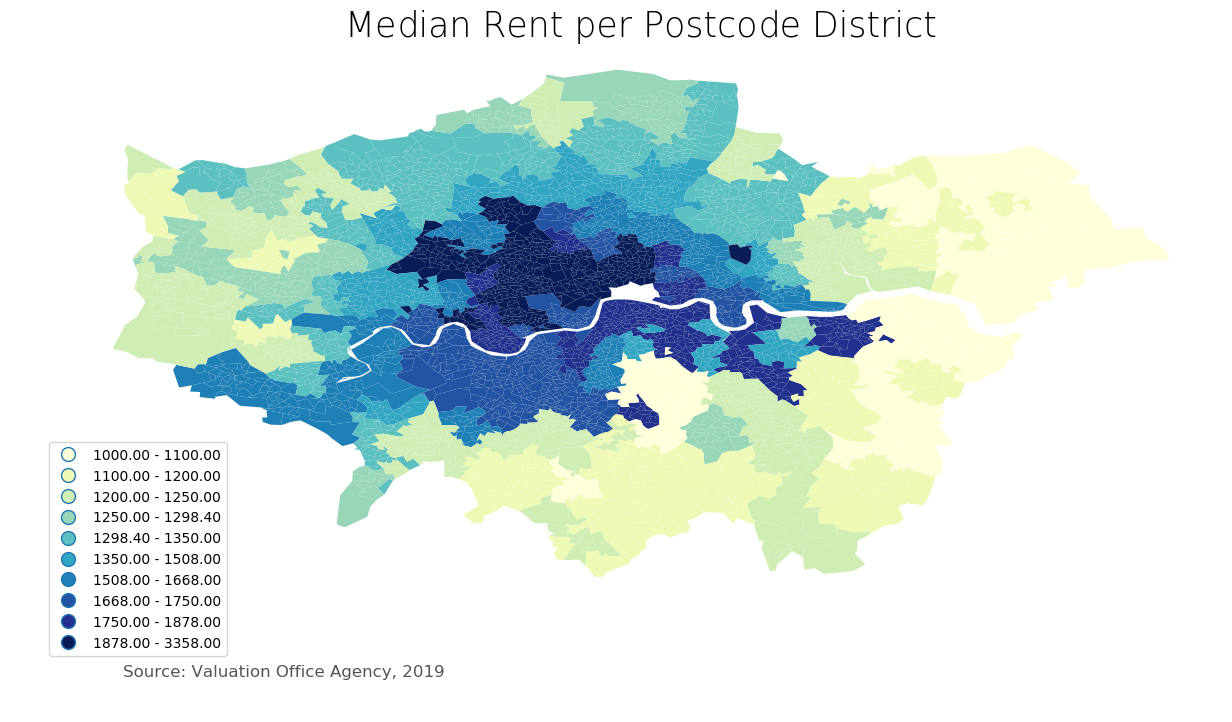

In [57]:
rent_map= crime_commute_rent.plot(column='Median_Rent', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=10, legend =  
                                  True);

#remove axis
rent_map.axis('off')
# add a title
rent_map.set_title('Median Rent per Postcode District', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
rent_map.annotate('Source: Valuation Office Agency, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#move legend to an empty space
rent_map.get_legend().set_bbox_to_anchor((.15,.3))

# this will save the figure as a high-res png. you can also save as svg
#commute_map.savefig('commute_map.png', dpi=300)

### 3.E. Near by parks


#### Parks
>**Data source:** Foursquare API  
**Foursquare Category Id:** Parks: 4bf58dd8d48988d163941735  National parks: 52e81612bcbc57f1066b7a21,  State / Provincial Park: 5bae9231bedf3950379f89d0,  Dog run: 4bf58dd8d48988d1e5941735  

In [58]:
# Fetch the file
venues = project.get_file("venues.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
venues.seek(0)
venues=pd.read_csv(venues)
venues.head()

,Postcode District,Total_venues
0,BR1,100
1,BR2,66
2,BR3,9
3,BR4,86
4,BR5,6


In [59]:
London_df= pd.merge(crime_commute_rent, venues, how='right', on='Postcode District') 
London_df.head(10)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District,crime_per_1000,public_transport_time_mins,Median_Rent,Total_venues
0,5.0,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5,126.597687,65.0,1063.0,6
1,1649.0,Bromley 029C,Bromley 029C,3.609263e+05,2755.137042,POLYGON ((0.1169602057201928 51.38070353177273...,BR5 4JP,E00003888,51.381101,0.112138,BR5,66.390041,62.0,1063.0,6
2,3298.0,Bromley 014E,Bromley 014E,1.369637e+05,2062.999564,POLYGON ((0.1089723105937523 51.40263617316915...,BR5 3SB,E00003594,51.399822,0.109262,BR5,99.744246,72.0,1063.0,6
3,3301.0,Bromley 014D,Bromley 014D,4.612618e+05,3509.856306,POLYGON ((0.1138637115064312 51.40059908286021...,BR5 2QH,E00003574,51.408775,0.110494,BR5,95.854922,83.0,1063.0,6
4,3305.0,Bromley 023C,Bromley 023C,2.312132e+05,2634.221302,POLYGON ((0.1013903893214578 51.39464549031378...,BR5 2NZ,E00003597,51.396641,0.099110,BR5,35.991531,70.0,1063.0,6
5,3309.0,Bromley 014B,Bromley 014B,4.598111e+05,3258.596330,POLYGON ((0.1103787460016984 51.39899428140831...,BR5 2LL,E00003598,51.395789,0.107495,BR5,137.049942,66.0,1063.0,6
6,4013.0,Bromley 023B,Bromley 023B,3.679486e+05,3209.926866,POLYGON ((0.1162393713386351 51.38781684824332...,BR5 4AN,E00003529,51.384807,0.112567,BR5,81.015719,63.0,1063.0,6
7,4505.0,Bromley 025E,Bromley 025E,4.913287e+05,3493.189679,POLYGON ((0.07732256305500072 51.3958444490719...,BR5 1LB,E00003971,51.391172,0.088094,BR5,25.357607,58.0,1063.0,6
8,4977.0,Bromley 019E,Bromley 019E,2.649821e+06,7148.106660,POLYGON ((0.1379595985430157 51.41220421782705...,BR5 3LY,E00003501,51.398234,0.121495,BR5,162.790698,83.0,1063.0,6
9,5282.0,Bromley 032B,Bromley 032B,1.515034e+05,1813.032251,POLYGON ((0.1134693367376506 51.37587137216043...,BR5 4QH,E00003863,51.375479,0.123144,BR5,96.482412,83.0,1063.0,6


In [60]:
London_df.describe()

,objectid,st_areashape,st_lengthshape,Latitude,Longitude,crime_per_1000,public_transport_time_mins,Median_Rent,Total_venues
count,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,17316.358252,3.253017e+05,2373.204752,51.505927,-0.117892,100.121607,51.622696,1484.774902,35.445641
std,9904.363015,6.353839e+05,1447.952069,0.075582,0.155099,173.455501,15.156123,363.007740,30.857723
min,5.000000,2.384727e+03,410.093838,51.298747,-0.496741,9.556314,0.000000,1000.000000,4.000000
25%,8678.000000,1.276122e+05,1570.798602,51.452695,-0.217431,51.034483,40.000000,1250.000000,10.000000
50%,17323.000000,2.011406e+05,2036.519298,51.512905,-0.114275,70.733290,51.000000,1350.000000,20.000000
75%,25938.000000,3.262734e+05,2713.056325,51.562570,-0.015706,102.873563,61.000000,1700.000000,56.000000
max,34751.000000,1.590369e+07,21342.177910,51.682138,0.309367,6844.928751,119.000000,3358.000000,100.000000


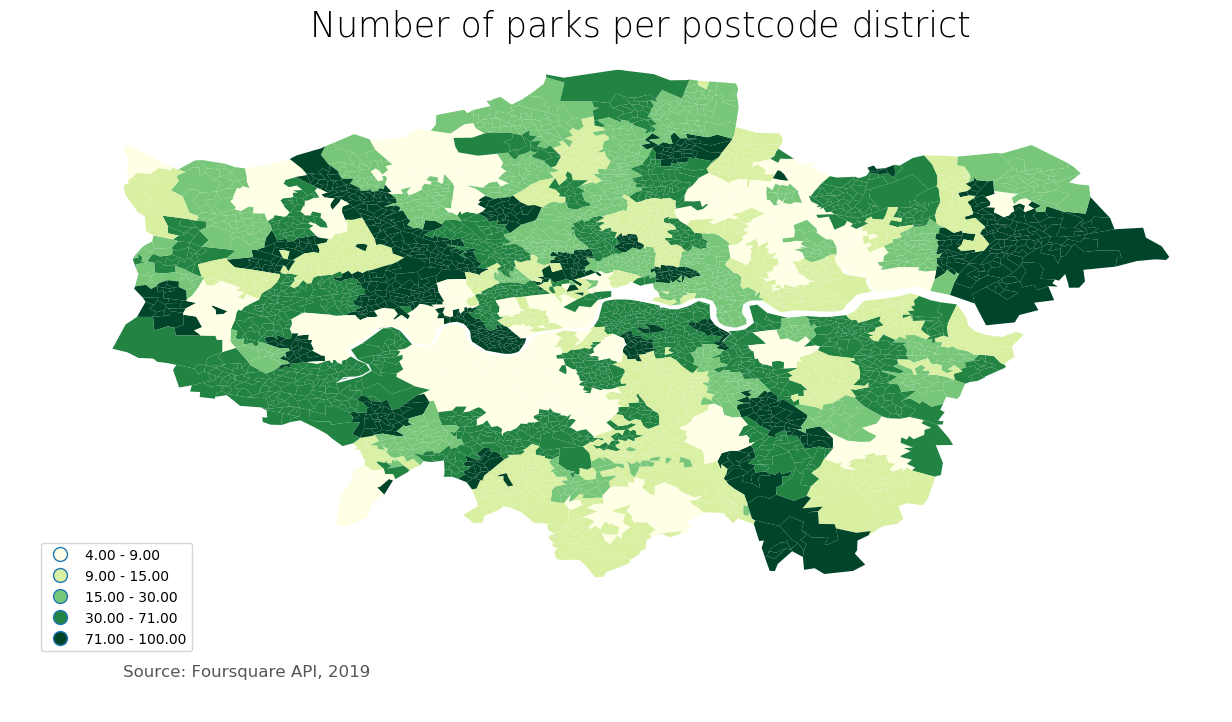

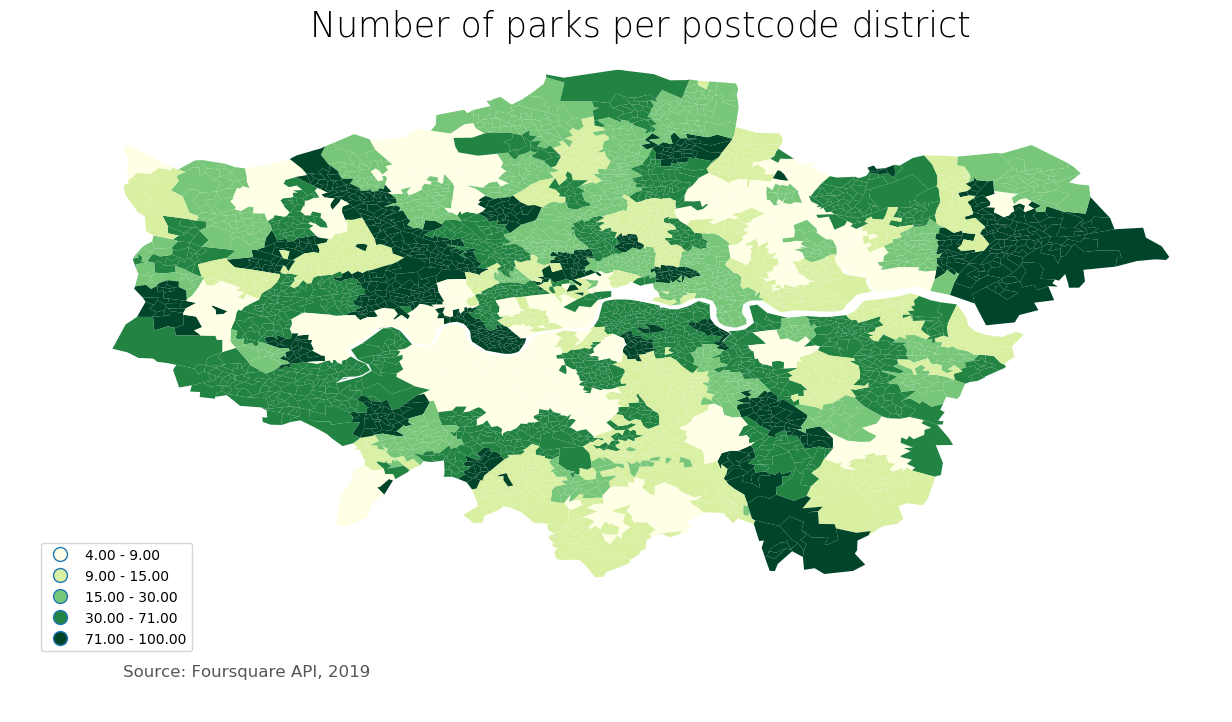

In [61]:
parks_map= London_df.plot(column='Total_venues', cmap =    
                                'YlGn', figsize=(15,9),   
                                 scheme='quantiles', k=5, legend =  
                                  True);
vmin=0
vmax=100
#remove axis
parks_map.axis('off')
# add a title
parks_map.set_title('Number of parks per postcode district', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
parks_map.annotate('Source: Foursquare API, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#move legend to an empty space
parks_map.get_legend().set_bbox_to_anchor((.12,.12))
parks_map.get_figure()

# this will save the figure as a high-res png. you can also save as svg
#fig.savefig('venues.png', dpi=300)


In [62]:
# Save dataframe as csv file to storage
project.save_data(data=London_df.to_csv(index=False),file_name='London_crime_commute_parks.csv',overwrite=True)

{'file_name': 'London_crime_commute_parks.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'dogfriendlyneigbourhoodsinlondon-donotdelete-pr-amafn7rntlwjrx',
 'asset_id': '9d92ea94-6779-4e80-8ddb-ad37288e3038'}

## 4. Modelling

### 4.A. Preprocessing

In [63]:
London_cluster = London_df.iloc[:,11:]
print(London_df.shape)
print(London_cluster.shape)
print(London_cluster.dtypes)
London_cluster.head()

(4829, 15)
(4829, 4)
crime_per_1000                float64
public_transport_time_mins    float64
Median_Rent                   float64
Total_venues                    int64
dtype: object


,crime_per_1000,public_transport_time_mins,Median_Rent,Total_venues
0,126.597687,65.0,1063.0,6
1,66.390041,62.0,1063.0,6
2,99.744246,72.0,1063.0,6
3,95.854922,83.0,1063.0,6
4,35.991531,70.0,1063.0,6


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


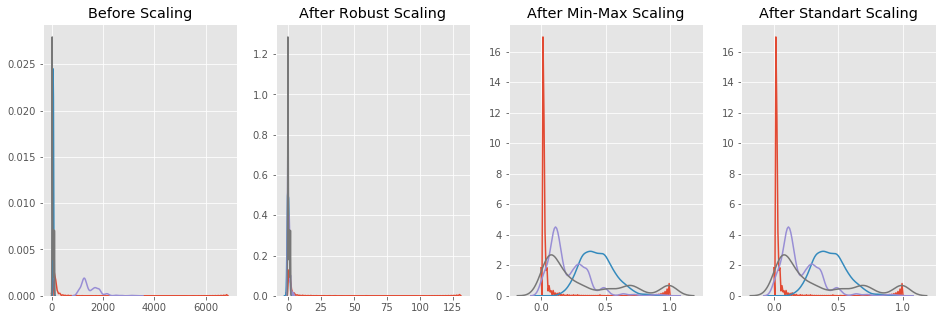

In [64]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

x=London_cluster
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['crime_per_1000', 'public_transport_time_mins', 'Median_Rent', 'Total_venues'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['crime_per_1000', 'public_transport_time_mins', 'Median_Rent', 'Total_venues'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['crime_per_1000'], ax=ax1)
sns.kdeplot(x['public_transport_time_mins'], ax=ax1)
sns.kdeplot(x['Median_Rent'], ax=ax1)
sns.kdeplot(x['Total_venues'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['crime_per_1000'], ax=ax2)
sns.kdeplot(robust_scaled_df['public_transport_time_mins'], ax=ax2)
sns.kdeplot(robust_scaled_df['Median_Rent'], ax=ax2)
sns.kdeplot(robust_scaled_df['Total_venues'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['crime_per_1000'], ax=ax3)
sns.kdeplot(minmax_scaled_df['public_transport_time_mins'], ax=ax3)
sns.kdeplot(minmax_scaled_df['Median_Rent'], ax=ax3)
sns.kdeplot(minmax_scaled_df['Total_venues'], ax=ax3)

ax4.set_title('After Standart Scaling')
sns.kdeplot(minmax_scaled_df['crime_per_1000'], ax=ax4)
sns.kdeplot(minmax_scaled_df['public_transport_time_mins'], ax=ax4)
sns.kdeplot(minmax_scaled_df['Median_Rent'], ax=ax4)
sns.kdeplot(minmax_scaled_df['Total_venues'], ax=ax4)

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

X = London_cluster.values[:,1:]
X = np.nan_to_num(X)
data_transformed = StandardScaler().fit_transform(X)
data_transformed

array([[ 0.88272502, -1.16200988, -0.95433777],
       [ 0.68476472, -1.16200988, -0.95433777],
       [ 1.34463239, -1.16200988, -0.95433777],
       ...,
       [ 2.00450005, -0.646816  ,  0.34206841],
       [-1.69075887,  2.89617506,  0.50411918],
       [-1.75674564,  0.68387193, -0.72746669]])

### 4.B. Deciding on k

In [66]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(data_transformed)
labels = k_means.labels_

print(labels)

[1 1 1 ... 1 3 2]


In [67]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

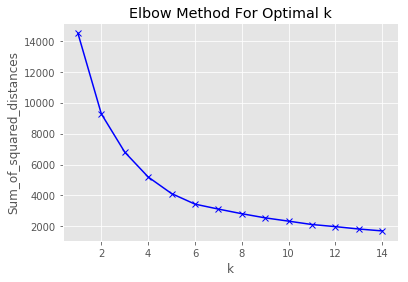

In [68]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow chart for the dataset does not have a clear elbow. Instead, we see a fairly smooth curve, and it's unclear what is the best value of k to choose. 

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = data_transformed

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3488809848407165
For n_clusters=3, The Silhouette Coefficient is 0.36647887082724245
For n_clusters=4, The Silhouette Coefficient is 0.3610327190851161
For n_clusters=5, The Silhouette Coefficient is 0.37878425133394766
For n_clusters=6, The Silhouette Coefficient is 0.35033159949928055
For n_clusters=7, The Silhouette Coefficient is 0.32584872217215466
For n_clusters=8, The Silhouette Coefficient is 0.3210073880591543
For n_clusters=9, The Silhouette Coefficient is 0.3146509922755996
For n_clusters=10, The Silhouette Coefficient is 0.3184566980279562
For n_clusters=11, The Silhouette Coefficient is 0.3340225788457897
For n_clusters=12, The Silhouette Coefficient is 0.34292976269441816
For n_clusters=13, The Silhouette Coefficient is 0.34806791100410556
For n_clusters=14, The Silhouette Coefficient is 0.3203579405551857


## 5. Results

In [70]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_transformed)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [71]:
London_df.insert(12,'Cluster_Labels', kmeans.labels_)
London_df.head(100)

,objectid,lsoa11nm,lsoa11nmw,st_areashape,st_lengthshape,geometry,Postcode,LSOA2,Latitude,Longitude,Postcode District,crime_per_1000,Cluster_Labels,public_transport_time_mins,Median_Rent,Total_venues
0,5.0,Bromley 023A,Bromley 023A,5.691620e+05,3524.308527,POLYGON ((0.1146063324029615 51.39254569837126...,BR5 2EE,E00003519,51.389834,0.107552,BR5,126.597687,0,65.0,1063.0,6
1,1649.0,Bromley 029C,Bromley 029C,3.609263e+05,2755.137042,POLYGON ((0.1169602057201928 51.38070353177273...,BR5 4JP,E00003888,51.381101,0.112138,BR5,66.390041,0,62.0,1063.0,6
2,3298.0,Bromley 014E,Bromley 014E,1.369637e+05,2062.999564,POLYGON ((0.1089723105937523 51.40263617316915...,BR5 3SB,E00003594,51.399822,0.109262,BR5,99.744246,0,72.0,1063.0,6
3,3301.0,Bromley 014D,Bromley 014D,4.612618e+05,3509.856306,POLYGON ((0.1138637115064312 51.40059908286021...,BR5 2QH,E00003574,51.408775,0.110494,BR5,95.854922,0,83.0,1063.0,6
4,3305.0,Bromley 023C,Bromley 023C,2.312132e+05,2634.221302,POLYGON ((0.1013903893214578 51.39464549031378...,BR5 2NZ,E00003597,51.396641,0.099110,BR5,35.991531,0,70.0,1063.0,6
5,3309.0,Bromley 014B,Bromley 014B,4.598111e+05,3258.596330,POLYGON ((0.1103787460016984 51.39899428140831...,BR5 2LL,E00003598,51.395789,0.107495,BR5,137.049942,0,66.0,1063.0,6
6,4013.0,Bromley 023B,Bromley 023B,3.679486e+05,3209.926866,POLYGON ((0.1162393713386351 51.38781684824332...,BR5 4AN,E00003529,51.384807,0.112567,BR5,81.015719,0,63.0,1063.0,6
7,4505.0,Bromley 025E,Bromley 025E,4.913287e+05,3493.189679,POLYGON ((0.07732256305500072 51.3958444490719...,BR5 1LB,E00003971,51.391172,0.088094,BR5,25.357607,0,58.0,1063.0,6
8,4977.0,Bromley 019E,Bromley 019E,2.649821e+06,7148.106660,POLYGON ((0.1379595985430157 51.41220421782705...,BR5 3LY,E00003501,51.398234,0.121495,BR5,162.790698,0,83.0,1063.0,6
9,5282.0,Bromley 032B,Bromley 032B,1.515034e+05,1813.032251,POLYGON ((0.1134693367376506 51.37587137216043...,BR5 4QH,E00003863,51.375479,0.123144,BR5,96.482412,0,83.0,1063.0,6


In [72]:
London_df['Cluster_Labels'].value_counts()

0    1641
4    1468
2     737
3     723
1     260
Name: Cluster_Labels, dtype: int64

/opt/conda/envs/Python36/lib/python3.6/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 4
  Warn('Warning: setting k to %d' % k_q, UserWarning)


Text(0.5, 1.0, 'Clusters for k=5')

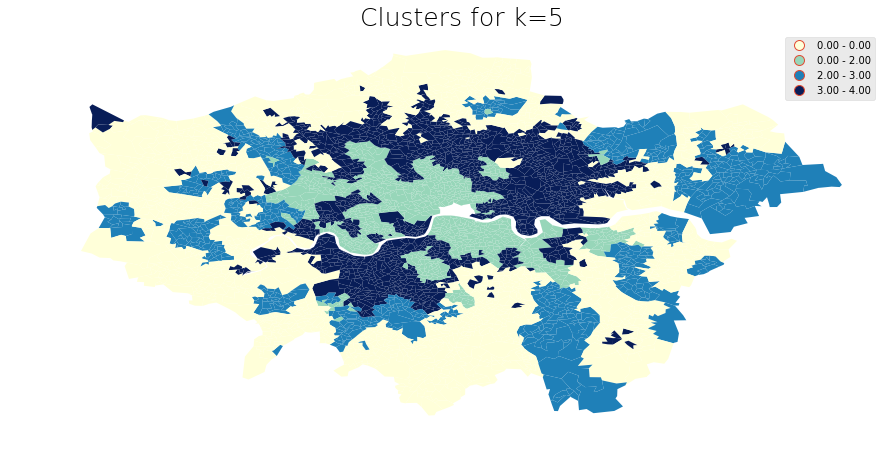

In [73]:
clusters= London_df.plot(column='Cluster_Labels', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=5, legend =  
                                  True);
vmin=0
vmax=4
#remove axis
clusters.axis('off')
# add a title
clusters.set_title('Clusters for k=5', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source

#clusters.legend('off')
#move legend to an empty space
#clusters.get_legend().set_bbox_to_anchor((.12,.12))

# this will save the figure as a high-res png. you can also save as svg
#fig.savefig('testmap.png', dpi=300)


In [74]:
London_1=London_df[['Postcode','Cluster_Labels', 'public_transport_time_mins', 'crime_per_1000','Median_Rent' ,'Total_venues' ]]
London_1.head(100)



,Postcode,Cluster_Labels,public_transport_time_mins,crime_per_1000,Median_Rent,Total_venues
0,BR5 2EE,0,65.0,126.597687,1063.0,6
1,BR5 4JP,0,62.0,66.390041,1063.0,6
2,BR5 3SB,0,72.0,99.744246,1063.0,6
3,BR5 2QH,0,83.0,95.854922,1063.0,6
4,BR5 2NZ,0,70.0,35.991531,1063.0,6
5,BR5 2LL,0,66.0,137.049942,1063.0,6
6,BR5 4AN,0,63.0,81.015719,1063.0,6
7,BR5 1LB,0,58.0,25.357607,1063.0,6
8,BR5 3LY,0,83.0,162.790698,1063.0,6
9,BR5 4QH,0,83.0,96.482412,1063.0,6


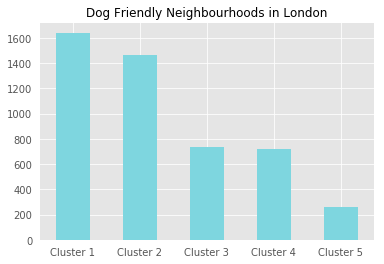

In [75]:
London_1['Cluster_Labels'].value_counts().plot(kind = 'bar', color=['#7ed6df'])
plt.title('Dog Friendly Neighbourhoods in London', fontsize = 12)
plt.xticks(np.arange(5), ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), rotation = 'horizontal')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)

plt.show()



Best neighbourhoods to live for the below listed criteria:
- Dog friendly
- Commute time to Bank station < 45
- Crime low
- 2 bed rent price <2000


In [76]:
criteria_1 = (London_1['Cluster_Labels'] == 2) | (London_1['Cluster_Labels'] == 3) | (London_1['Cluster_Labels'] == 5)
criteria_2 = London_1['public_transport_time_mins'] < 45
criteria_3 = London_1['Median_Rent'] < 2000  
criteria_4 = London_1['crime_per_1000'] < 51  #Mean crime_per_1000 is 1000 %25 - 51

criteria_all = criteria_1 & criteria_2 & criteria_3 & criteria_4
London_best=London_1[criteria_all].sort_values(by = 'Median_Rent', axis = 0, ascending = True)                                                    
London_best.reset_index(drop = True, inplace = True)
London_best.head(10)


,Postcode,Cluster_Labels,public_transport_time_mins,crime_per_1000,Median_Rent,Total_venues
0,IG2 6QN,3,42.0,48.686739,1263.0,60
1,IG2 6EJ,3,41.0,46.562386,1263.0,60
2,HA9 8PN,2,44.0,32.540676,1400.0,100
3,SE8 4HU,2,43.0,31.683168,1500.0,100
4,SE8 3AN,2,41.0,50.779286,1500.0,100
5,SE5 8UU,2,43.0,45.278137,1500.0,80
6,E5 9TU,2,39.0,43.619792,1650.0,56
7,E5 8JR,2,36.0,47.890536,1650.0,56
8,N7 8GF,2,29.0,20.995334,1712.0,71
9,N7 0JP,2,33.0,48.531290,1712.0,71


Top 10 worst places to live with a dog due to high crime rate and rent prices 

In [77]:
criteria_1 = London_1['Cluster_Labels'] == 1
#criteria_2 = London_1['public_transport_time_mins'] > 45
#criteria_3 = London_1['Median_Rent'] > 1500  
criteria_4 = London_1['crime_per_1000'] > 100  #Mean crime_per_1000 is 1000 %25 - 51

criteria_all = criteria_1 & criteria_4
London_best=London_1[criteria_all].sort_values(by = 'crime_per_1000', axis = 0, ascending = False)                                                    
London_best.reset_index(drop = True, inplace = True)
London_best.head(10)

,Postcode,Cluster_Labels,public_transport_time_mins,crime_per_1000,Median_Rent,Total_venues
0,W1R 5LG,1,26.0,6844.928751,2536.0,13
1,WC2N4HY,1,19.0,5032.723239,2536.0,31
2,W1A 0ZA,1,25.0,3524.840764,2536.0,10
3,WC2N5HX,1,18.0,3128.979144,2536.0,31
4,WC2E7QZ,1,16.0,1935.302391,2536.0,31
5,W1F 0ET,1,27.0,1714.285714,2536.0,79
6,EC2A3SL,1,20.0,1409.948542,1950.0,40
7,W1H 0EN,1,31.0,1364.250338,3142.0,10
8,W1P 0JH,1,21.0,1182.452063,2536.0,22
9,W1X 7LF,1,28.0,974.876847,2536.0,8
